# ARIMA Model for Time Series

ARIMA stands for `Auto Regressive Integerated Moving Average`

## About ARIMA:

- It is a `forecasting techinque` that projects the future values of a series based entirely on its own inertia
- Its main application is in the area of `Short Term Forecasting` requiring atleast 40 historical data points
- It works best when your data exhibits a `stable or consistent pattern` overtime with a minimum amount of outliers

The development of ARIMA Models is often attributed to `George Box and Gwilym Jenkins in the 1970s`, who used models like `Auto Regressive Models, Moving Average Models` as a part of their apporach to analyze economic and industrial time series data by `Integerating` them into `ARIMA Models` .

## Assumptions for ARIMA Model

When applying an ARIMA (AutoRegressive Integrated Moving Average) model, certain assumptions need to be met to ensure the model's effectiveness and accuracy. Here are the key assumptions:

- **Stationarity:**
  - The time series data should be stationary, meaning its statistical properties such as mean, variance, and autocorrelation are constant over time. If the data is not stationary, differencing or other transformations may be required to achieve stationarity.

- **Linearity:**
  - The relationship between past values and future values in the time series should be linear. ARIMA models are based on the assumption that the future value of the series is a linear function of past values and past forecast errors.

- **No Sudden Jumps or Breaks:**
  - The time series should not contain abrupt changes or structural breaks. Sudden jumps or shifts can invalidate the assumptions of the ARIMA model, as the model assumes a consistent underlying process.

- **No Missing Values:**
  - The dataset should not have missing values. Missing data can lead to biased estimates and affect the model's performance. Any missing values should be imputed or handled appropriately before applying the ARIMA model.

- **Invertibility:**
  - The model's parameters should ensure invertibility of the moving average (MA) part of the model. This means that the MA part should be able to be expressed as an infinite series of past errors, ensuring that the model can be properly identified and estimated.

By ensuring these assumptions are met, you can better utilize the ARIMA model to forecast and analyze time series data.


## Basic Rundown of ARIMA model

- `AR: Auto Regression`
    - A model that uses the dependent relationship between an observation and some number of lagged observations (previous periods).
- `I: Integerated`
    - The use of differencing of raw observations (subtracting an observation from an observation at the previous time step) in order to make the time 
    series stationary.
- `MA: Moving Average`
    - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

## Parameters of the ARIMA Model

ARIMA models are generally denoted by ARIMA(p, d, q) where parameters p, d and q are non negative integers,
- `p` is the order(number of time lags) of the autoregressive models
- `d` is the degree of differencing (the number of times the data have had past values subtracted), and
- `q` is the order of the moving-average model.

### Understanding ARIMA Model Parameters



ARIMA models are denoted as ARIMA(p, d, q), where \( p \), \( d \), and \( q \) are non-negative integers. Each parameter has a specific role in the modeling process:

#### 1. Order of the Autoregressive (AR) Term (\(p\))

**Explanation:**
- The autoregressive (AR) term reflects the influence of previous observations on the current observation. The parameter \( p \) indicates the number of lagged values used in the model. A higher \( p \) means more past values are considered.

**Example:**
- Consider monthly sales data:
  - January: 100
  - February: 120
  - March: 130
  - April: 140

  If \( p = 2 \), the model uses the sales data from February and March to forecast April’s sales. Thus, the forecast for April might be influenced by the sales values from February and March.

#### 2. Degree of Differencing (\(d\))

**Explanation:**
- Differencing is used to make the time series stationary by removing trends or seasonality. The parameter \( d \) specifies how many times differencing is applied.

**Example:**
- Using the same sales data with an upward trend:
  - January: 100
  - February: 120
  - March: 130
  - April: 140

  Applying first-order differencing (\( d = 1 \)):
  - Difference between February and January: 120 - 100 = 20
  - Difference between March and February: 130 - 120 = 10
  - Difference between April and March: 140 - 130 = 10

  The differenced series is: 20, 10, 10. If this series is stationary, \( d = 1 \) is sufficient. If not, further differencing may be required.

#### 3. Order of the Moving-Average (MA) Term (\(q\))

**Explanation:**
- The moving-average (MA) term models the relationship between the current value and past forecast errors. The parameter \( q \) specifies the number of lagged forecast errors used.

**Example:**
- With the same sales data, if \( q = 2 \), the MA part of the model uses the errors from the previous two months to forecast the current month's sales.

  Suppose the forecast errors for the last two months were:
  - Error in March: -5
  - Error in April: +10

  With \( q = 2 \), these errors are used to adjust the forecast for May. If May’s forecasted value is 150, it will be adjusted based on the errors from March and April.

#### Selecting the Right Parameters

Choosing the appropriate values for \( p \), \( d \), and \( q \) is crucial for effective modeling. This involves analyzing the time series data, checking for stationarity, and using techniques such as ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots to determine the most suitable values.

#### Model Diagnostics

After fitting an ARIMA model, it's important to check the model diagnostics to ensure it adequately captures the time series dynamics. This includes analyzing residuals to confirm they resemble white noise and checking for any remaining patterns that the model might not have captured.

In summary, ARIMA(p, d, q) models utilize these parameters to account for past values, differences to stabilize the series, and past errors for accurate forecasting. Each parameter plays a crucial role in capturing different aspects of the time series data.

## Why to use the ARIMA Model

1. Auto Correlated Time Series
2. Less Data is required for Forecasting
3. Short Term Forecasting
4. Accuracy
5. Business Expansion Short Term 

## Application of ARIMA Model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Set a random seed for reproductability
np.random.seed(0)

# Create time series of 200 points
n = 200
t = np.arange(n)

# Create a simple trend of 0.1 + t + random noise
data = 0.1 * t + np.random.randn(n)

# Convert to Pandas Series for convinience
s = pd.Series(data)

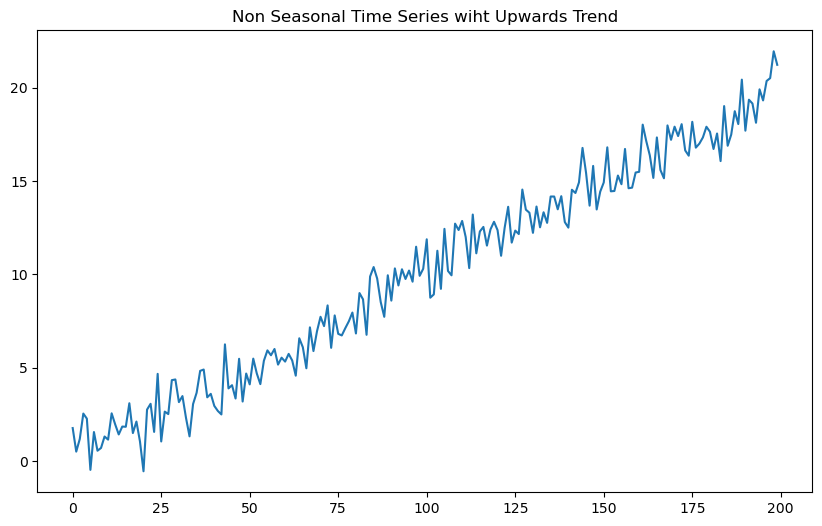

In [5]:
plt.figure(figsize=(10,6))
plt.plot(s)
plt.title("Non Seasonal Time Series wiht Upwards Trend")
plt.show()

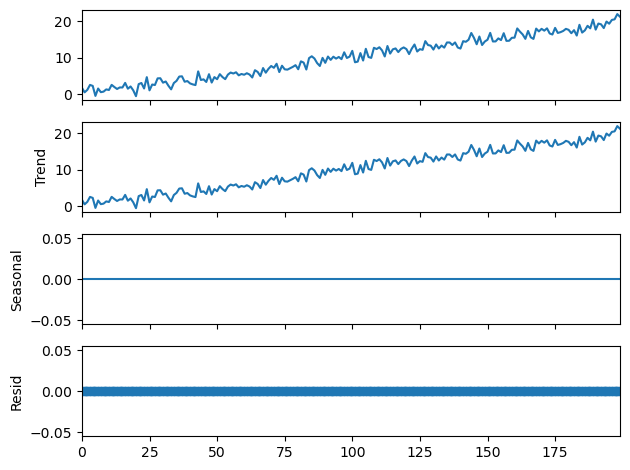

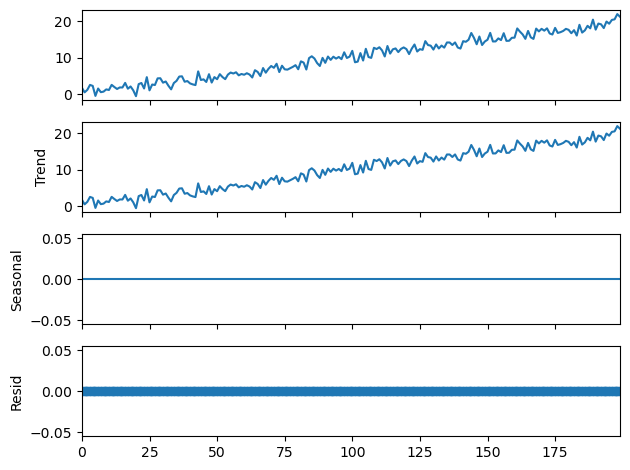

In [8]:
# Decompose the data into Trend, Seasonality, and Residual components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(s, model = 'additive', period=1)

decomposition.plot()

c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


200    21.257435
201    21.684908
202    21.345384
203    22.046315
204    21.815076
205    21.826035
206    22.043169
207    22.019659
208    22.492637
209    22.252195
Name: predicted_mean, dtype: float64


c:\Users\PS144\miniconda3\envs\timeseries_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[]

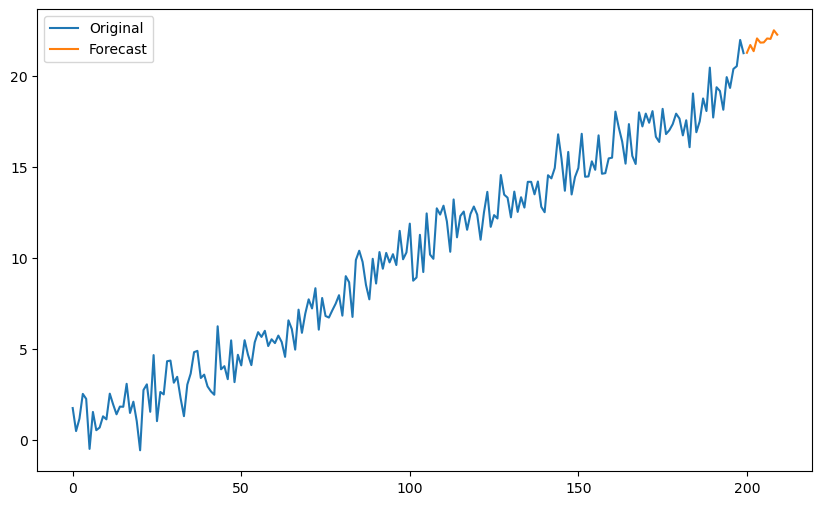

In [22]:
# Now we predict the data

model = ARIMA(s, order=(5, 2, 5))
model_fit = model.fit()

# Generate the forecast
forecast = model_fit.forecast(steps = 10)

# Print the Forecast
print(forecast)

# plot the original and the forecast
plt.figure(figsize=(10,6))
plt.plot(s, label = 'Original')
plt.plot(forecast, label = 'Forecast')
plt.legend(loc='best')
plt.plot()